In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
# Import the csv
df = pd.read_csv("karrot_dataset.csv")

In [25]:
df

,Date,Campaign Name,Ad Set,Ad,Spend,CPM,Impressions,Clicks,Add to Cart,Add Payment Info,Purchase
0,01-Apr-24,2024-04 - Spring Sale,2024-04 - Canada,2024-04 - Britney - UGC - A,$99.00,$6.12,"16,185",421,21,7,4
1,01-Apr-24,2024-04 - Spring Sale,2024-04 - Canada,2024-04 - Britney - UGC - B,$86.00,$5.30,"16,213",402,16,6,5
2,01-Apr-24,2024-04 - Spring Sale,2024-04 - Canada,2024-04 - Britney - UGC - C,$86.00,$6.87,"12,518",507,26,7,5
3,01-Apr-24,2024-04 - Spring Sale,2024-04 - Canada,2024-04 - Mark - UGC - A,$87.00,$5.29,"16,439",708,35,12,9
4,01-Apr-24,2024-04 - Spring Sale,2024-04 - Canada,2024-04 - Mark - UGC - B,$65.00,$5.70,"11,408",402,18,7,5
...,...,...,...,...,...,...,...,...,...,...,...
1093,31-May-24,2024-04 - Retargeting,2024-04 - Canada - Retargeting,2024-04 - Mark - UGC - B,$37.00,$25.66,"1,442",240,12,4,4
1094,31-May-24,2024-04 - Retargeting,2024-04 - Canada - Retargeting,2024-04 - Mark - UGC - C,$45.00,$26.12,"1,723",182,7,3,2
1095,31-May-24,2024-04 - Retargeting,2024-04 - Canada - Retargeting,2024-04 - Shoes - Animated,$49.00,$26.21,"1,870",572,32,11,10
1096,31-May-24,2024-04 - Retargeting,2024-04 - Canada - Retargeting,2024-04 - Shorts - Animated,$40.00,$26.59,"1,504",173,7,3,2


In [27]:
# Convert Date Format
df["Date"] = pd.to_datetime(df["Date"], format="%d-%b-%y")

# Convert "Clicks" and "Impressions" to numeric (remove commas and errors)
df["Clicks"] = pd.to_numeric(df["Clicks"].astype(str).str.replace(',', ''), errors='coerce')
df["Impressions"] = pd.to_numeric(df["Impressions"].astype(str).str.replace(',', ''), errors='coerce')
df["Spend"] = pd.to_numeric(df["Spend"].astype(str).str.replace('$', ''), errors='coerce')
df['CPM'] = pd.to_numeric(df["CPM"].astype(str).str.replace('$', ''), errors='coerce')

In [29]:
# Group by Date and Campaign Name, summing the relevant columns
df_grouped = df.groupby(["Date", "Campaign Name"])[["Add to Cart", "Add Payment Info", "Purchase"]].sum().reset_index()
df_grouped

,Date,Campaign Name,Add to Cart,Add Payment Info,Purchase
0,2024-04-01,2024-04 - Retargeting,116,34,26
1,2024-04-01,2024-04 - Spring Sale,188,61,46
2,2024-04-02,2024-04 - Retargeting,131,48,37
3,2024-04-02,2024-04 - Spring Sale,205,70,52
4,2024-04-03,2024-04 - Retargeting,118,35,27
...,...,...,...,...,...
117,2024-05-29,2024-04 - Spring Sale,187,61,46
118,2024-05-30,2024-04 - Retargeting,108,35,25
119,2024-05-30,2024-04 - Spring Sale,268,96,69
120,2024-05-31,2024-04 - Retargeting,130,45,36


In [31]:
df.to_csv("cleaned_data.csv")

## Graphical Analysis

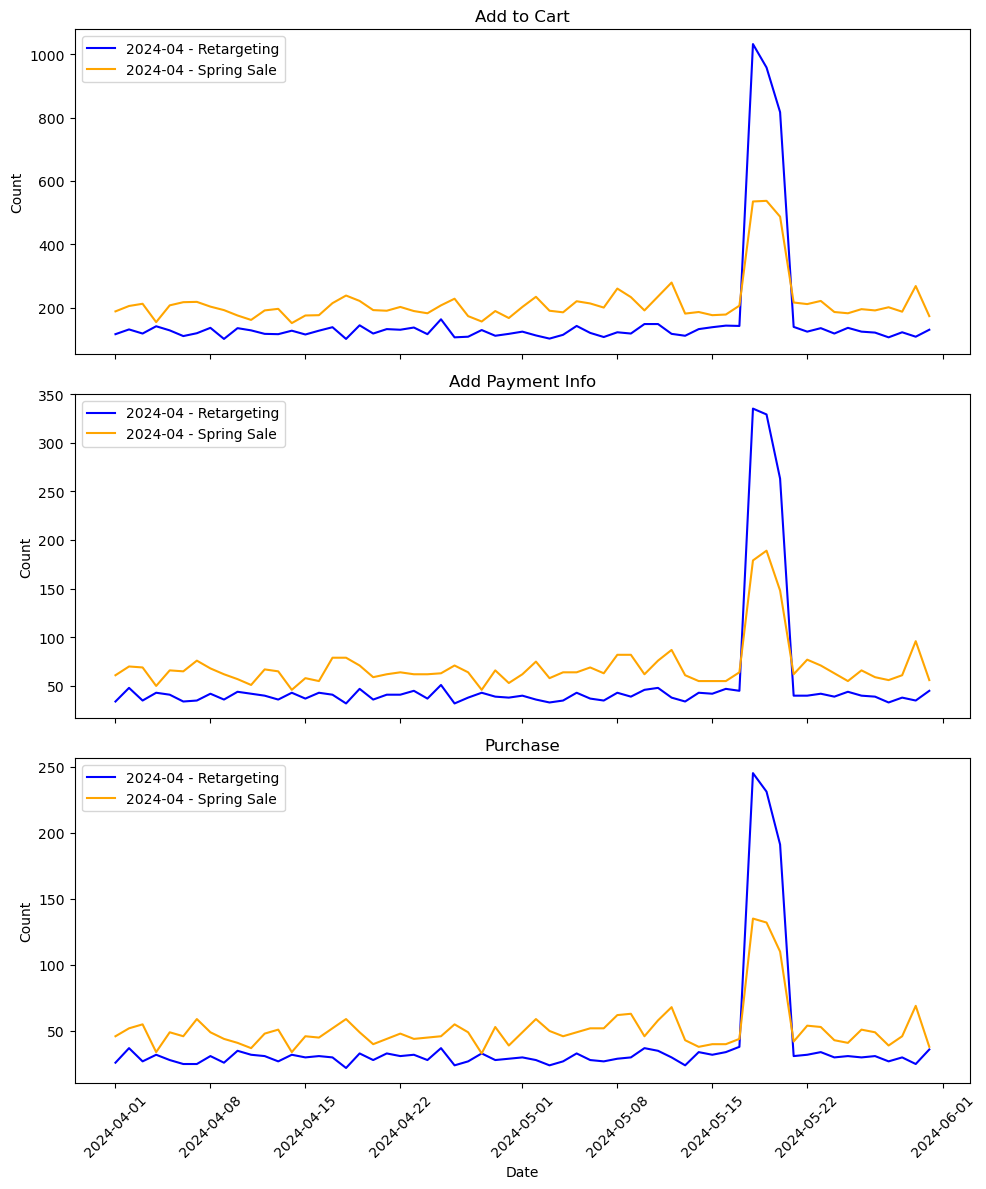

In [39]:
# Get unique campaign names
campaigns = df_grouped["Campaign Name"].unique()

# Plot each metric over time for each campaign
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

metrics = ["Add to Cart", "Add Payment Info", "Purchase"]
colors = ["blue", "orange"]  # Adjust based on the number of campaigns

for i, metric in enumerate(metrics):
    ax = axes[i]
    for j, campaign in enumerate(campaigns):
        subset = df_grouped[df_grouped["Campaign Name"] == campaign]
        ax.plot(subset["Date"], subset[metric], label=campaign, color=colors[j])
    ax.set_title(metric)
    ax.legend()
    ax.set_ylabel("Count")

axes[-1].set_xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [53]:
# Group by Date and Campaign Name, summing the relevant columns
df_graph2 = df.groupby(["Date", "Campaign Name"])[["Clicks", "Impressions"]].sum().reset_index()

df_graph2

,Date,Campaign Name,Clicks,Impressions
0,2024-04-01,2024-04 - Retargeting,2425,14160
1,2024-04-01,2024-04 - Spring Sale,4189,129335
2,2024-04-02,2024-04 - Retargeting,3014,15431
3,2024-04-02,2024-04 - Spring Sale,4752,125979
4,2024-04-03,2024-04 - Retargeting,2808,14637
...,...,...,...,...
117,2024-05-29,2024-04 - Spring Sale,4603,122394
118,2024-05-30,2024-04 - Retargeting,2909,13747
119,2024-05-30,2024-04 - Spring Sale,5594,133587
120,2024-05-31,2024-04 - Retargeting,2887,14653


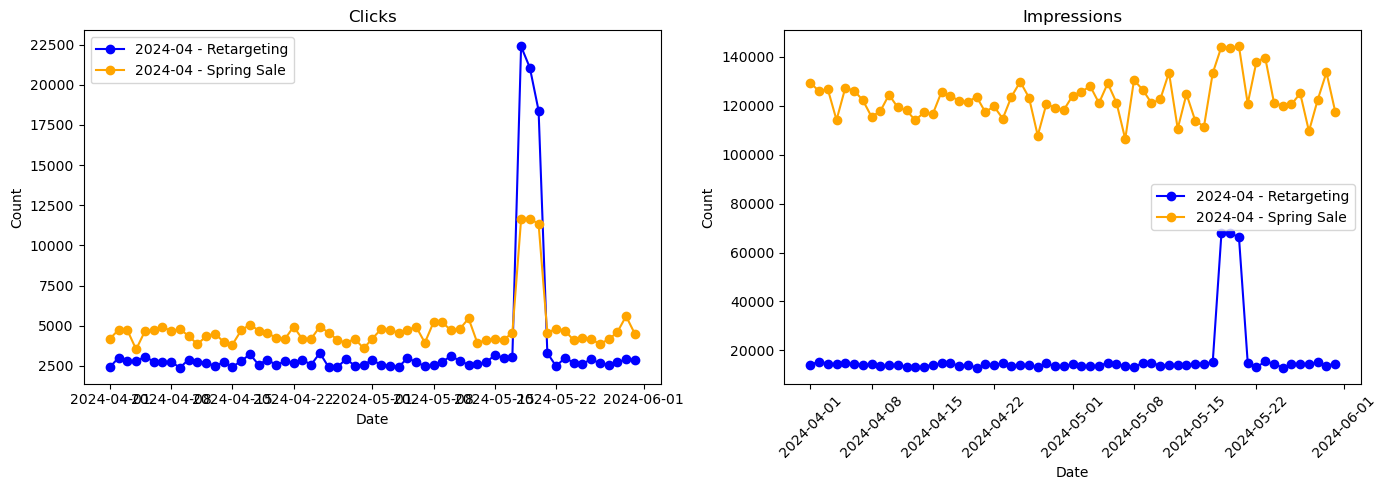

In [55]:
# Get unique campaign names
campaigns = df_graph2["Campaign Name"].unique()
metrics = ["Clicks", "Impressions"]
colors = ["blue", "orange"]

# Create a 1-row, 2-column subplot layout (since we only need 2 plots)
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=True)

for i, metric in enumerate(metrics):  
    ax = axes[i]  # Select subplot
    for j, campaign in enumerate(campaigns):
        subset = df_graph2[df_graph2["Campaign Name"] == campaign]
        ax.plot(subset["Date"], subset[metric], label=campaign, color=colors[j], marker='o', linestyle='-')
    
    ax.set_title(metric)
    ax.legend()
    ax.set_ylabel("Count")
    ax.set_xlabel("Date")

# Formatting
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

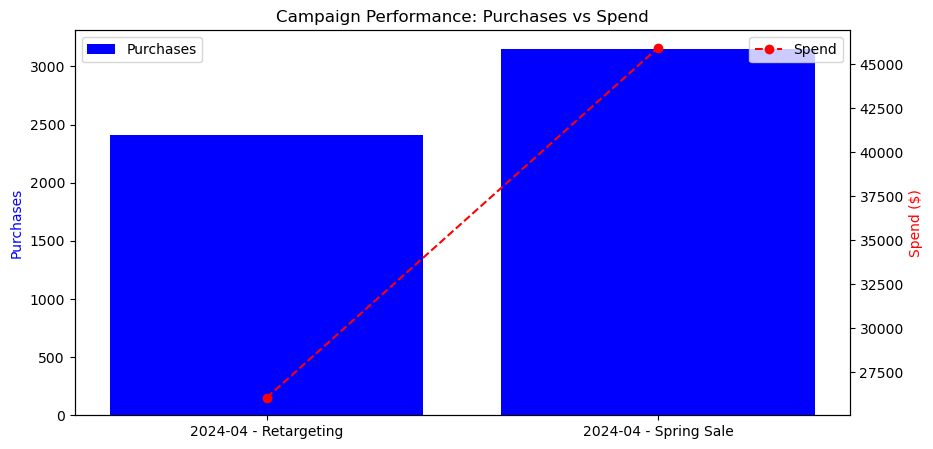

In [81]:
campaigns = df.groupby("Campaign Name")[["Purchase", "Spend"]].sum()

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.bar(campaigns.index, campaigns["Purchase"], color="blue", label="Purchases")
ax2 = ax1.twinx()
ax2.plot(campaigns.index, campaigns["Spend"], color="red", marker="o", linestyle="dashed", label="Spend")

ax1.set_ylabel("Purchases", color="blue")
ax2.set_ylabel("Spend ($)", color="red")
ax1.set_title("Campaign Performance: Purchases vs Spend")

ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.xticks(rotation=45)
plt.show()

## Metrics

In [59]:
# Total purchases gained from each campaign
df.groupby("Campaign Name")["Purchase"].sum().sort_values(ascending=False)

Campaign Name
2024-04 - Spring Sale    3153
2024-04 - Retargeting    2414
Name: Purchase, dtype: int64

In [33]:
df.groupby("Campaign Name")["Spend"].sum().sort_values(ascending=False)

Campaign Name
2024-04 - Spring Sale    45942.0
2024-04 - Retargeting    26063.0
Name: Spend, dtype: float64

In [61]:
# Conversion rate
df["Conversion Rate"] = (df["Purchase"] / df["Clicks"]) * 100
df.groupby("Campaign Name")["Conversion Rate"].mean().sort_values(ascending=False)

Campaign Name
2024-04 - Retargeting    1.094104
2024-04 - Spring Sale    1.081592
Name: Conversion Rate, dtype: float64

Conversion rates are fairly similar

In [77]:
# Click through rate
df["CTR"] = (df["Clicks"] / df["Impressions"]) * 100
df.groupby("Campaign Name")["CTR"].mean().sort_values(ascending=False)

Campaign Name
2024-04 - Retargeting    19.993023
2024-04 - Spring Sale     3.887960
Name: CTR, dtype: float64

Wow! The retargetting campaign is significantly more effective at gaining clicks

In [73]:
# Amount spent on advertising for each purchase
df["Cost per Purchase"] = df["Spend"] / df["Purchase"]
df.groupby("Campaign Name")["Cost per Purchase"].mean().sort_values()

Campaign Name
2024-04 - Retargeting    14.929660
2024-04 - Spring Sale    22.133526
Name: Cost per Purchase, dtype: float64